In [2]:
pip install librosa

   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ------ --------------------------------- 41.0/260.1 kB 1.9 MB/s eta 0:00:01
   --------- ----------------------------- 61.4/260.1 kB 812.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/260.1 kB 812.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/260.1 kB 812.7 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/260.1 kB 476.3 kB/s eta 0:00:01
   ------------------------- ----

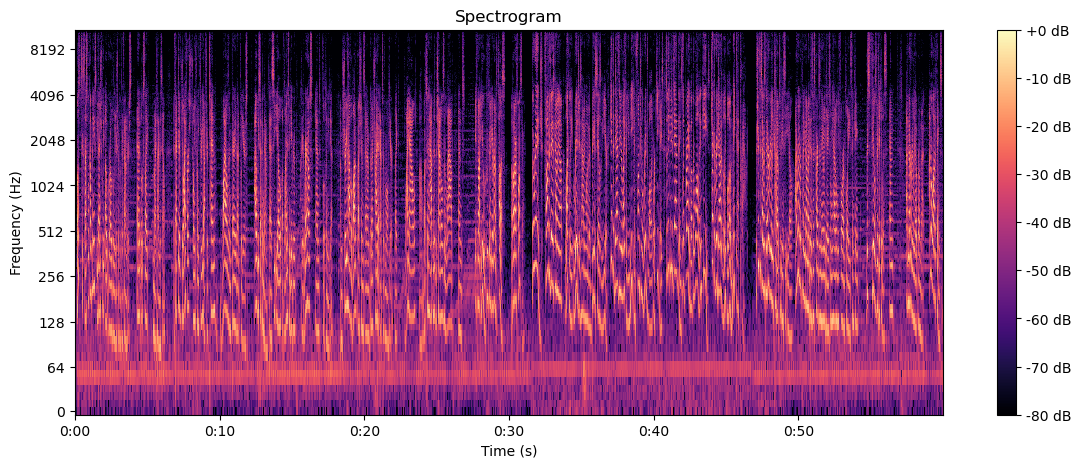

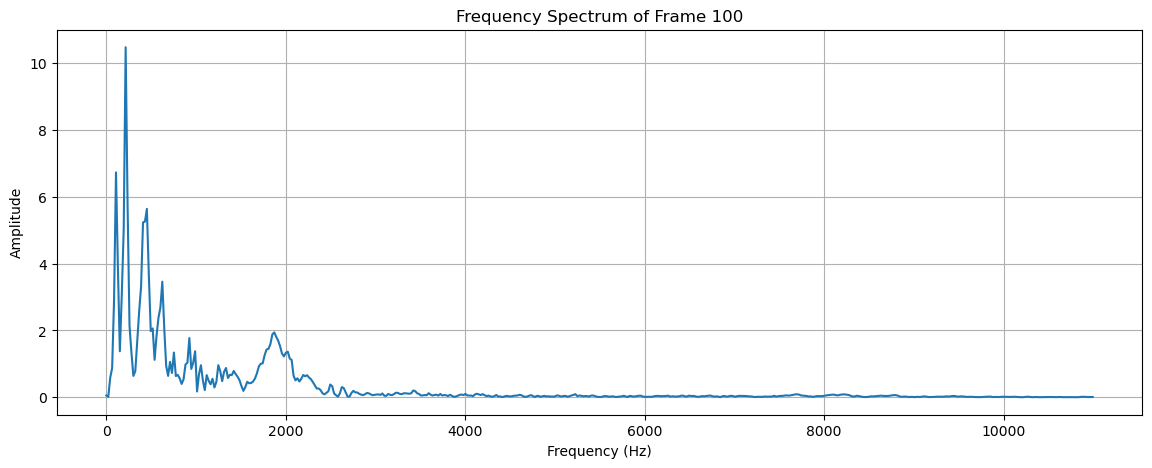

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrogram(audio_path, sr=22050):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Calculate the Short-Time Fourier Transform (STFT)
    D = np.abs(librosa.stft(y))
    
    # Convert amplitude to dB
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
    
    return y, sr, D

def plot_frame_spectrum(D, sr, frame_num):
    # Get the magnitude spectrum for a specific frame
    frame_spectrum = np.abs(D[:, frame_num])
    
    # Get the corresponding frequencies
    freqs = np.fft.fftfreq(len(frame_spectrum), 1 / sr)
    
    # Only take the positive frequencies
    pos_freqs = freqs[:len(frame_spectrum)//2]
    pos_spectrum = frame_spectrum[:len(frame_spectrum)//2]
    
    # Plot the frequency spectrum of the specific frame
    plt.figure(figsize=(14, 5))
    plt.plot(pos_freqs, pos_spectrum)
    plt.title(f'Frequency Spectrum of Frame {frame_num}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Example usage
audio_path = r'C:/Users/dkdis/Desktop/DEMONSTRATION\DEMONSTRATION/linus-original-DEMO.mp3'  # Replace with your audio file path
y, sr, D = plot_spectrogram(audio_path)

# Plot the frequency spectrum of a specific frame (e.g., frame number 100)
frame_num = 100
plot_frame_spectrum(D, sr, frame_num)


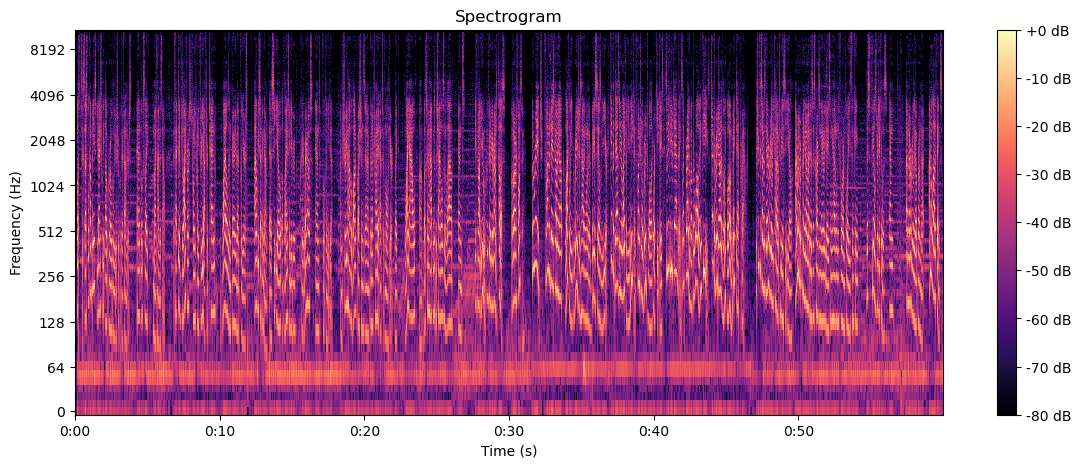

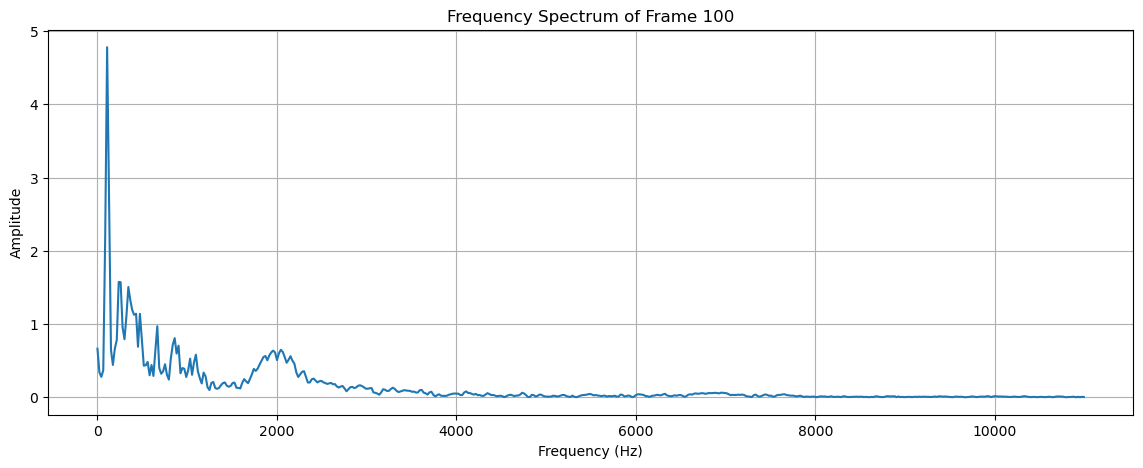

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrogram(audio_path, sr=22050):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Calculate the Short-Time Fourier Transform (STFT)
    D = np.abs(librosa.stft(y))
    
    # Convert amplitude to dB
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
    
    return y, sr, D

def plot_frame_spectrum(D, sr, frame_num):
    # Get the magnitude spectrum for a specific frame
    frame_spectrum = np.abs(D[:, frame_num])
    
    # Get the corresponding frequencies
    freqs = np.fft.fftfreq(len(frame_spectrum), 1 / sr)
    
    # Only take the positive frequencies
    pos_freqs = freqs[:len(frame_spectrum)//2]
    pos_spectrum = frame_spectrum[:len(frame_spectrum)//2]
    
    # Plot the frequency spectrum of the specific frame
    plt.figure(figsize=(14, 5))
    plt.plot(pos_freqs, pos_spectrum)
    plt.title(f'Frequency Spectrum of Frame {frame_num}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Example usage
audio_path = r'C:/Users/dkdis/Desktop/DEMONSTRATION/DEMONSTRATION/linus-to-musk-DEMO.mp3'  # Replace with your audio file path
y, sr, D = plot_spectrogram(audio_path)

# Plot the frequency spectrum of a specific frame (e.g., frame number 100)
frame_num = 100
plot_frame_spectrum(D, sr, frame_num)


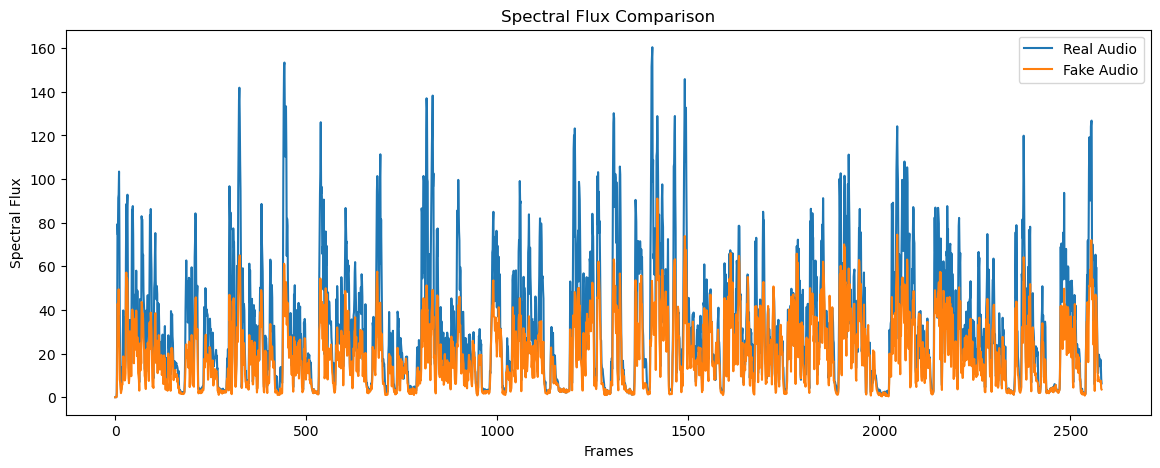

Mean Spectral Flux (Real): 33.1317253112793
Mean Spectral Flux (Fake): 19.86136245727539


In [15]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def calculate_spectral_flux(audio_path, sr=22050):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Calculate the Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(y))
    
    # Compute the spectral flux
    flux = np.sqrt(np.sum(np.diff(stft, axis=1)**2, axis=0))
    
    return flux

def plot_spectral_flux(flux_real, flux_fake):
    plt.figure(figsize=(14, 5))
    plt.plot(flux_real, label='Real Audio')
    plt.plot(flux_fake, label='Fake Audio')
    plt.xlabel('Frames')
    plt.ylabel('Spectral Flux')
    plt.title('Spectral Flux Comparison')
    plt.legend()
    plt.show()

# Example usage
real_audio_path = r'C:/Users/dkdis/Desktop/DEMONSTRATION\DEMONSTRATION/linus-original-DEMO.mp3'  # raw string to avoid unicode escape error
fake_audio_path = r'C:/Users/dkdis/Desktop/DEMONSTRATION\DEMONSTRATION/linus-to-musk-DEMO.mp3'  # raw string to avoid unicode escape error

# Calculate spectral flux for real and fake audio
flux_real = calculate_spectral_flux(real_audio_path)
flux_fake = calculate_spectral_flux(fake_audio_path)

# Plot the spectral flux
plot_spectral_flux(flux_real, flux_fake)

# Calculate the mean spectral flux for comparison
mean_flux_real = np.mean(flux_real)
mean_flux_fake = np.mean(flux_fake)

print(f'Mean Spectral Flux (Real): {mean_flux_real}')
print(f'Mean Spectral Flux (Fake): {mean_flux_fake}')


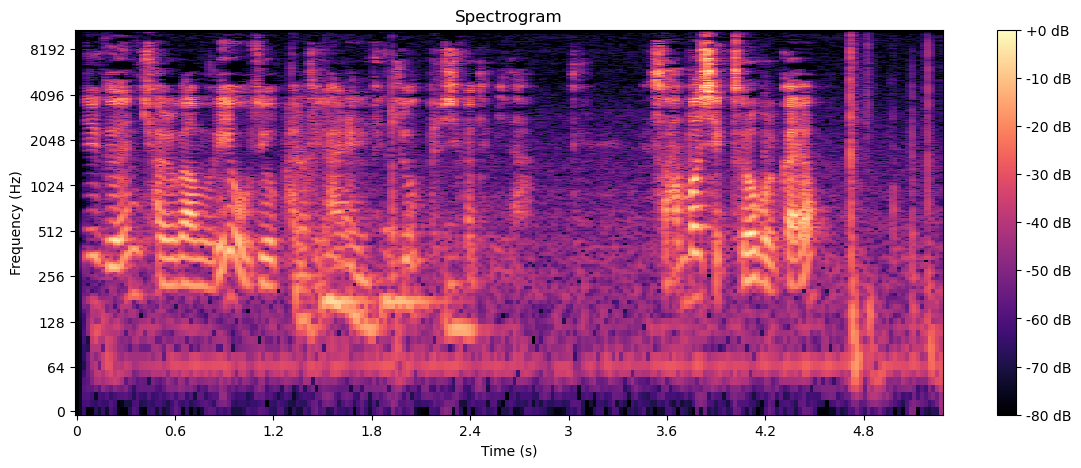

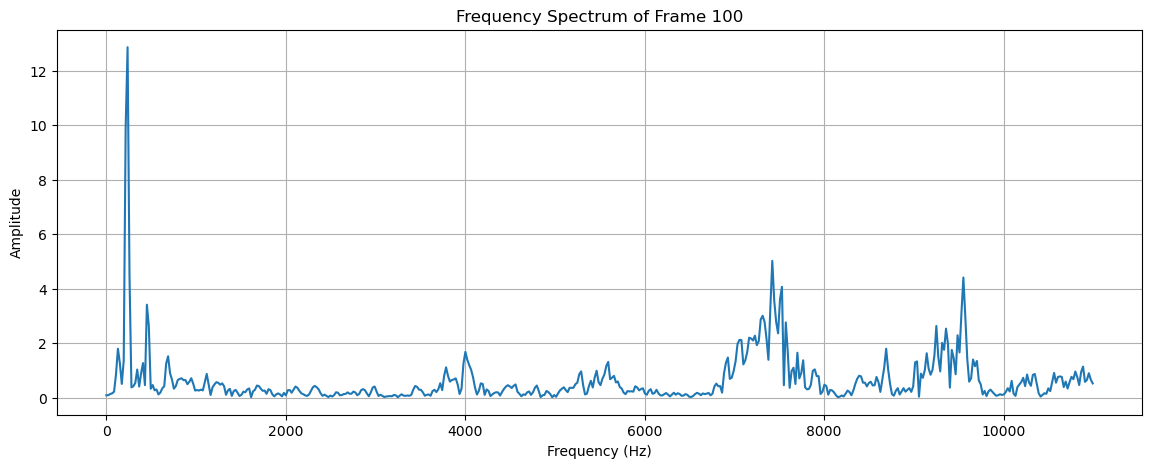

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrogram(audio_path, sr=22050):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Calculate the Short-Time Fourier Transform (STFT)
    D = np.abs(librosa.stft(y))
    
    # Convert amplitude to dB
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
    
    return y, sr, D

def plot_frame_spectrum(D, sr, frame_num):
    # Get the magnitude spectrum for a specific frame
    frame_spectrum = np.abs(D[:, frame_num])
    
    # Get the corresponding frequencies
    freqs = np.fft.fftfreq(len(frame_spectrum), 1 / sr)
    
    # Only take the positive frequencies
    pos_freqs = freqs[:len(frame_spectrum)//2]
    pos_spectrum = frame_spectrum[:len(frame_spectrum)//2]
    
    # Plot the frequency spectrum of the specific frame
    plt.figure(figsize=(14, 5))
    plt.plot(pos_freqs, pos_spectrum)
    plt.title(f'Frequency Spectrum of Frame {frame_num}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Example usage
audio_path = r"C:\Users\dkdis\Desktop\DEMONSTRATION\원본.mp3"  
y, sr, D = plot_spectrogram(audio_path)

# Plot the frequency spectrum of a specific frame (e.g., frame number 100)
frame_num = 100
plot_frame_spectrum(D, sr, frame_num)


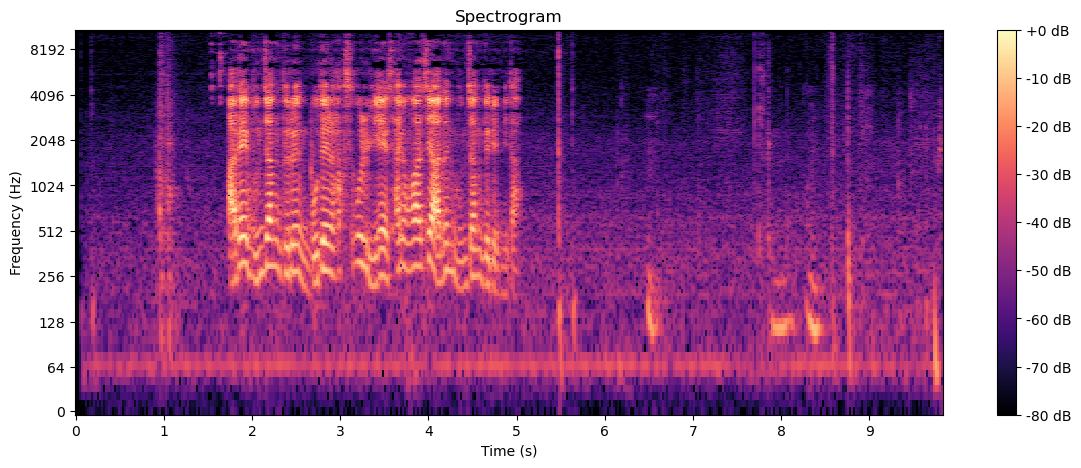

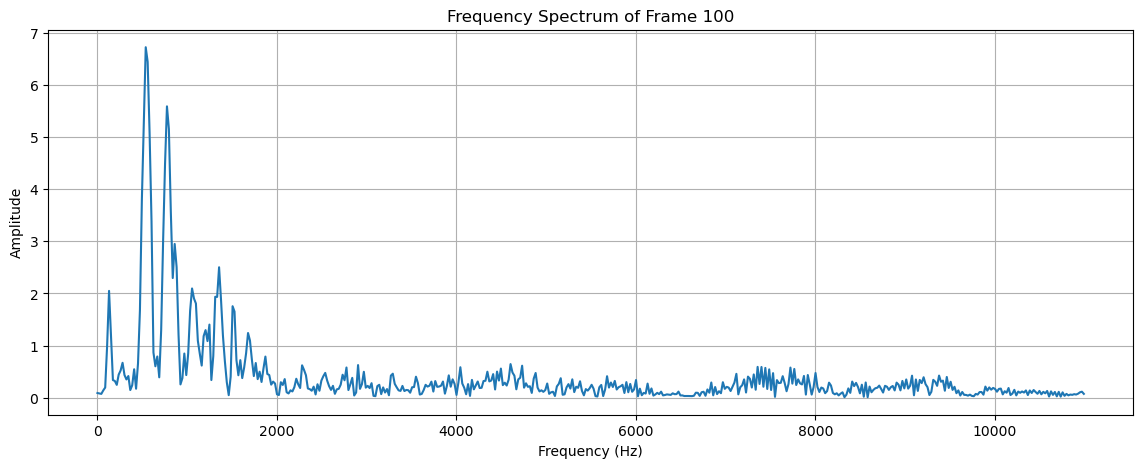

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrogram(audio_path, sr=22050):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Calculate the Short-Time Fourier Transform (STFT)
    D = np.abs(librosa.stft(y))
    
    # Convert amplitude to dB
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
    
    return y, sr, D

def plot_frame_spectrum(D, sr, frame_num):
    # Get the magnitude spectrum for a specific frame
    frame_spectrum = np.abs(D[:, frame_num])
    
    # Get the corresponding frequencies
    freqs = np.fft.fftfreq(len(frame_spectrum), 1 / sr)
    
    # Only take the positive frequencies
    pos_freqs = freqs[:len(frame_spectrum)//2]
    pos_spectrum = frame_spectrum[:len(frame_spectrum)//2]
    
    # Plot the frequency spectrum of the specific frame
    plt.figure(figsize=(14, 5))
    plt.plot(pos_freqs, pos_spectrum)
    plt.title(f'Frequency Spectrum of Frame {frame_num}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Example usage
audio_path = r"C:\Users\dkdis\Desktop\DEMONSTRATION\조작.mp3"  
y, sr, D = plot_spectrogram(audio_path)

# Plot the frequency spectrum of a specific frame (e.g., frame number 100)
frame_num = 100
plot_frame_spectrum(D, sr, frame_num)


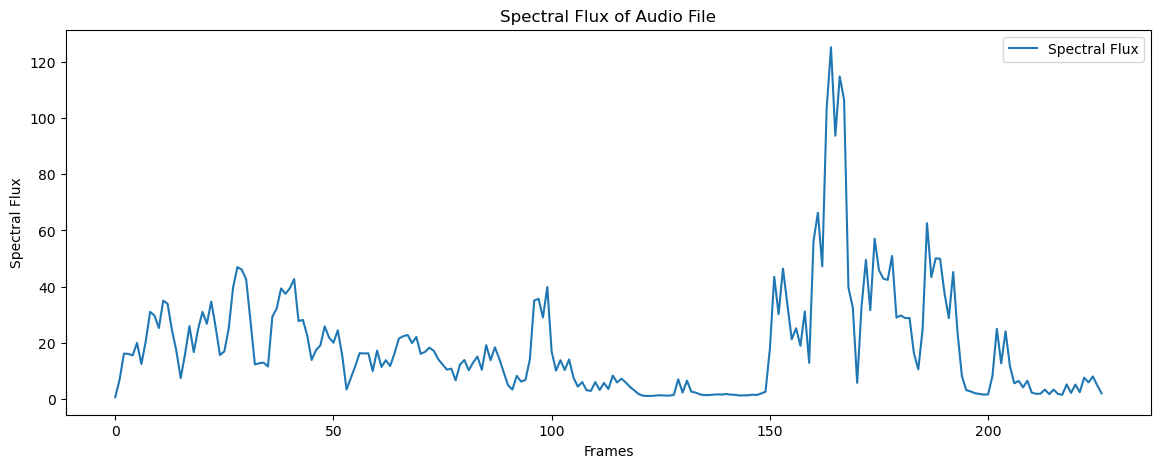

Mean Spectral Flux (Real): 19.001996994018555


In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def calculate_spectral_flux(audio_path, sr=22050):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Calculate the Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(y))
    
    # Compute the spectral flux
    flux = np.sqrt(np.sum(np.diff(stft, axis=1)**2, axis=0))
    
    return flux

def plot_spectral_flux(flux, title='Spectral Flux'):
    plt.figure(figsize=(14, 5))
    plt.plot(flux, label='Spectral Flux')
    plt.xlabel('Frames')
    plt.ylabel('Spectral Flux')
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage:
audio_path = r"C:\Users\dkdis\Desktop\DEMONSTRATION\원본.mp3"
flux = calculate_spectral_flux(audio_path)
plot_spectral_flux(flux, title='Spectral Flux of Audio File')

mean_flux_real = np.mean(flux)

print(f'Mean Spectral Flux (Real): {mean_flux_real}')


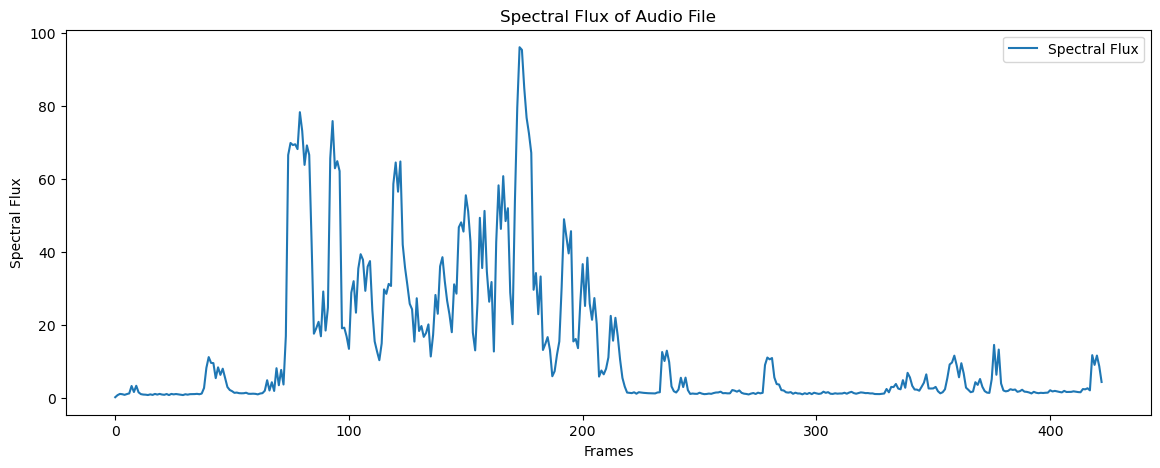

Mean Spectral Flux (Real): 13.635601043701172


In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def calculate_spectral_flux(audio_path, sr=22050):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Calculate the Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(y))
    
    # Compute the spectral flux
    flux = np.sqrt(np.sum(np.diff(stft, axis=1)**2, axis=0))
    
    return flux

def plot_spectral_flux(flux, title='Spectral Flux'):
    plt.figure(figsize=(14, 5))
    plt.plot(flux, label='Spectral Flux')
    plt.xlabel('Frames')
    plt.ylabel('Spectral Flux')
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage:
audio_path = r"C:\Users\dkdis\Desktop\DEMONSTRATION\조작.mp3"
flux = calculate_spectral_flux(audio_path)
plot_spectral_flux(flux, title='Spectral Flux of Audio File')

mean_flux_real = np.mean(flux)

print(f'Mean Spectral Flux (Real): {mean_flux_real}')
